# Multi-Layer Perceptron

## Initial Imports

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pyplot as pyplt
from sklearn.neural_network import MLPClassifier
from sklearn import metrics 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import confusion_matrix


def get_ds_infos():
    ## 0:Code, 1:Weight, 2:Height, 3:Age, 4:Gender
    dss = np.genfromtxt("data_subjects_info.csv",delimiter=',')
    dss = dss[1:]
    print("----> Data subjects information is imported.")
    return dss #read data subjects CSV file
ds_list = get_ds_infos()

def create_time_series(num_features, num_act_labels, num_gen_labels, label_codes, trial_codes):
    dataset_columns = num_features+num_act_labels+num_gen_labels
    ds_list = get_ds_infos() #information about the participants
    train_data = np.zeros((0,dataset_columns)) #making initial array
    test_data = np.zeros((0,dataset_columns))
    for i, sub_id in enumerate(ds_list[:,0]):
        for j, act in enumerate(label_codes):
            for trial in trial_codes[act]:
                fname ='motionsense-dataset/A_DeviceMotion_data/'+act+'_'+str(trial)+'/sub_'+str(int(sub_id))+'.csv'
                raw_data = pd.read_csv(fname)
                raw_data = raw_data.drop(['Unnamed: 0'], axis=1) #drop first column
                unlabel_data = raw_data.values #need to lavel the data for training
                label_data = np.zeros((len(unlabel_data), dataset_columns))
                label_data[:,:-(num_act_labels + num_gen_labels)] = unlabel_data
                label_data[:,label_codes[act]] = 1 #if that activity is included, 1 in column
                label_data[:,-(num_gen_labels)] = int(ds_list[i,4]) #picking the gender column
                ## long trials = training dataset Short trials = test dataset
                if trial > 10: #training data is later trials
                    test_data = np.append(test_data, label_data, axis = 0)
                else:    
                    train_data = np.append(train_data, label_data, axis = 0)
    return train_data , test_data #returns the two datasets - rows of individual results for each time stamp
print("--> Start...")
## Here we set parameter to build labeld time-series from dataset of "(A)DeviceMotion_data"
num_features = 12 # attitude(roll, pitch, yaw); gravity(x, y, z); rotationRate(x, y, z); userAcceleration(x,y,z)
num_act_labels = 6 # dws, ups, wlk, jog, sit, std
num_gen_labels = 1 # 0/1(female/male)
label_codes = {"dws":num_features, "ups":num_features+1, "wlk":num_features+2, "jog":num_features+3, "sit":num_features+4, "std":num_features+5}
trial_codes = {"dws":[1,2,11], "ups":[3,4,12], "wlk":[7,8,15], "jog":[9,16], "sit":[5,13], "std":[6,14]}    
## Use'create_time_series()' to build time-series
print("--> Building Training and Test Datasets...")
train_ts, test_ts = create_time_series(num_features, num_act_labels, num_gen_labels, label_codes, trial_codes)
print("--> Shape of Training Time-Seires:", train_ts.shape)
print("--> Shape of Test Time-Series:", test_ts.shape)



----> Data subjects information is imported.
--> Start...
--> Building Training and Test Datasets...
----> Data subjects information is imported.
--> Shape of Training Time-Seires: (1081446, 19)
--> Shape of Test Time-Series: (331419, 19)


## Initial Data and Training the Model

Once again, the models were trained with identicle testing and training datasets. The MLP was trained within the SKLearn package due to the simplicity of the code - keras would be an alternative model, with a more intricate build up of layers

In [2]:
#Establish datasets, as is seen in other model formation
TrainDF = pd.DataFrame(train_ts)
TestDF = pd.DataFrame(test_ts)


features= range(0,18)
x_train = TrainDF [features]
y_train = TrainDF[18]
x_test = TestDF [features]
y_test = TestDF[18]
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

MLP.fit(x_train, y_train)
prediction = MLP.predict(x_test)

### Measuring Accuracy

In [3]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction)) 
print('Precision: %.3f' % precision_score(y_test, prediction)) 
print('Recall: %.3f' % recall_score(y_test, prediction)) 
print('F1: %.3f' % f1_score(y_test, prediction)) 


Accuracy: 0.6518757222730139
Precision: 0.712
Recall: 0.673
F1: 0.692


### Confusion Matrix

Text(0.5, 15.0, 'Predicted label')

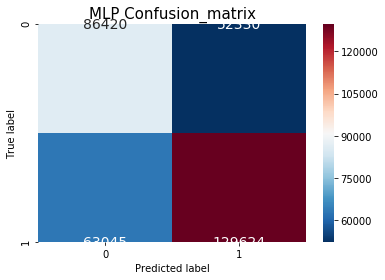

In [4]:
sns.heatmap(confusion_matrix(y_test, prediction),annot=True, annot_kws={"size": 14},fmt='3.0f',cmap="RdBu_r")
plt.title('MLP Confusion_matrix', y=1.05, size=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')



## Adjusting to test different samples

Accuracy: 0.7205846304694202
Precision: 0.753
Recall: 0.769
F1: 0.761


Text(0.5, 15.0, 'Predicted label')

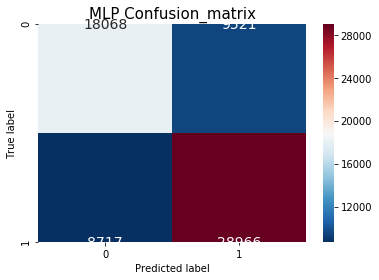

In [5]:
TrainDF = pd.DataFrame(train_ts[train_ts[:,14]==1])
TestDF = pd.DataFrame(test_ts[test_ts[:,14]==1])


features= range(0,18)
x_train = TrainDF [features]
y_train = TrainDF[18]
x_test = TestDF [features]
y_test = TestDF[18]
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5,2), random_state=1)

MLP.fit(x_train, y_train)
prediction = MLP.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, prediction)) #0.63553
print('Precision: %.3f' % precision_score(y_test, prediction)) #0.647 
print('Recall: %.3f' % recall_score(y_test, prediction)) #0.819
print('F1: %.3f' % f1_score(y_test, prediction)) #0.723

sns.heatmap(confusion_matrix(y_test, prediction),annot=True, annot_kws={"size": 14},fmt='3.0f',cmap="RdBu_r")
plt.title('MLP Confusion_matrix', y=1.05, size=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')


## Changing Parameters (5,2) to (10,10,10)

Accuracy: 0.6562327446525396
Precision: 0.688
Recall: 0.748
F1: 0.717


Text(0.5, 15.0, 'Predicted label')

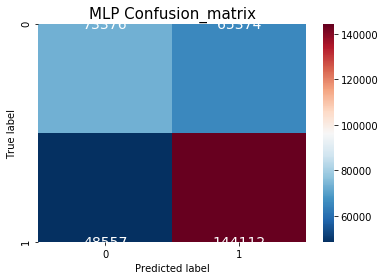

In [6]:
TrainDF = pd.DataFrame(train_ts)
TestDF = pd.DataFrame(test_ts)


features= range(0,18)
x_train = TrainDF [features]
y_train = TrainDF[18]
x_test = TestDF [features]
y_test = TestDF[18]
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(10, 10,10), random_state=1)

MLP.fit(x_train, y_train)
prediction = MLP.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, prediction)) #0.63553
print('Precision: %.3f' % precision_score(y_test, prediction)) #0.647 
print('Recall: %.3f' % recall_score(y_test, prediction)) #0.819
print('F1: %.3f' % f1_score(y_test, prediction)) #0.723

sns.heatmap(confusion_matrix(y_test, prediction),annot=True, annot_kws={"size": 14},fmt='3.0f',cmap="RdBu_r")
plt.title('MLP Confusion_matrix', y=1.05, size=15)
plt.title('MLP Confusion_matrix', y=1.05, size=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
